In [1]:
# what happens when we select one more basis element

In [2]:
from hamiltonian import *
from continuers import *
from qsearch_bundle_circuit import *
from quantum_circuit_mimic import *

In [5]:
def XYinQCinmain():
    ## XY model

    J = -1
    # Bx = 0.5
    Bx = 0.1
    N = 2
    pbc = False

    fig, ax, Bzlist, eval_stor = show_XY_spectrum(N=N, Bzmin=0, Bzmax=2, Bx=Bx, J=J, pbc=pbc)

    # Set up training parameter sets for eigenvector continuer
    # Bzlist = [0,0.2,0.75]
    # Bzlist_training = [0,1.9]
    # Bzlist_training = [0.5, 1.9]
    # Bzlist_training = [0.1, 1.3]
    # Bzlist_training_qc = [0.1, 1.7]
    # Bzlist_training_qc = [0.1, 1.3]
    # Bzlist_training = [0.1, 1.3,1.7]
    # Bzlist_training_qc = [0.1, 1.3,1.7]
    # Bzlist_training = [0.1, 1.3,1.9]
    # Bzlist_training_qc = [0.1, 1.3,1.9]
    Bzlist_training = [0.1, 1.3]
    Bzlist_training_qc = [0.1, 1.3]
    # Bzlist_training_qc = [0.1,0.8 ,1.3,1.7]
    # Bzlist_training = [0.1, 1.9]
    # Bzlist_training = [0, 0.1,0.2]
    # Bzlist_training = [0, 0.8]
    training_paramlist = [[J, Bx, Bz, N, pbc] for Bz in Bzlist_training]
    # _qc for passing parameters to the quantum circuit, because I prefer dictionaries than lists
    training_paramlist_qc = [{"J": J, "Bx": Bx, "Bz": Bz, "N": N, "pbc": pbc} for Bz in Bzlist_training_qc]
    training_paramlist_qclist = [[J, Bx, Bz, N, pbc] for Bz in Bzlist_training_qc]

    if 'ax' in locals():
        for b in Bzlist_training_qc:
            ax.axvline(b)

    # Set up target parameter sets for eigenvector continuer
    # Bzlist = np.linspace(0,2,20)
    Bzlist_target = [0.7,1.8]

    # Bzlist_target = [1.5,1.7,1.9]
    # Bzlist_target = [0.3, 0.5, 0.7, 1.1, 1.3, 1.5, 1.7]
    # Bzlist_target = [0.3, 0.5, 0.7, 1.1, 1.5, 1.7, 1.9]

    target_paramlist = [[J, Bx, Bz, N, pbc] for Bz in Bzlist_target]
    target_paramlist_qc = [{"J": J, "Bx": Bx, "Bz": Bz, "N": N, "pbc": pbc} for Bz in Bzlist_target]
    #################### INPUT parameters over ######################################

    # Object that knows how to deal with the various operations needed
    vectorspace = vector_methods(XY_hamiltonian)

    # Reference vector is internal for now
    # vectorspace = unitary_methods(N, XY_hamiltonian)

    # vectorspace = circuit_methods(N,XY_hamiltonian_Qiskit)

    EVcontinuer = vector_continuer(vectorspace,
                                   XY_hamiltonian,
                                   Mag_op,
                                   training_paramlist_qclist,
                                   target_paramlist,
                                   N)

    EVcontinuer.get_base_eigenvectors()
    # EVcontinuer.form_orthogonal_basis()

    # added_evals = EVcontinuer.get_target_eigenvectors(ortho=True)
    # added_evals = EVcontinuer.get_target_eigenvectors(ortho=False)
    EVcontinuer.get_target_eigenvectors(ortho=False)
    # print("Eigen values_continuer: ",added_evals)
    # print("Eigen values_continuer: ",EVcontinuer.target_evals)
    # print("basis_exact: ", basis_exact)
    # print("basis_exact: ", basis_exact_from_class)
    # print("basis_exact inside class: ", EVcontinuer.base_vecs)
    # print("Mag outside class: ", Mag_evals)
    # print("basis_exact inside class: ", EVcontinuer.target_magnetization)

    # exit()
    # mimic_evals = get_evals_targetlist_mimic(training_paramlist=training_paramlist_qc,target_paramlist=target_paramlist_qc)
    mimic_evals = get_evals_targetlist_mimic(training_paramlist=training_paramlist_qc,target_paramlist=target_paramlist_qc,\
                                             basis_vecs=EVcontinuer.base_vecs,Basis_exact_flag=True)
    #####################
    ######################## INPUT backend information of the quatnum machine ######################
    ##########
    backend_name = "qasm_simulator"
    # backend_name = "ibmq_qasm_simulator"
    # backend_name = "ibmq_bogota"
    # layout = [0,1,2]
    # backend_name = "ibm_lagos"
    # layout = [3,5,6]
    # backend_name = "ibmq_manila"
    # layout = [2,3,4]
    # backend_name = "ibmq_montreal"
    # layout = [0, 1, 2]

    # layout = [5, 3, 4]
    # shots=8192
    ##########
    # 3site
    # backend_name = "qasm_simulator"
    #     backend_name = "ibmq_bogota"
    #     layout = [1, 2, 3]
    # layout = [0, 1, 2]
    layout = [0, 1, 2]
    # shots = 8192
    shots = 20
    date_flag = True
    # date_flag=False
    ###################################### INPUT backend over #######################################

    # qasm_circuit_evals_separate =  get_evals_targetlist_qasmcirc_sepaate\
    #     ( training_paramlist=training_paramlist_qc, target_paramlist=target_paramlist_qc,backend_name=backend_name,layout=layout,shots=shots)

    # # uncomment for machine
    # qsearch_circuit_evals_bundle = get_evals_targetlist_qsearchcirc\
    #     (training_paramlist=training_paramlist_qc, target_paramlist=target_paramlist_qc,backend_name=backend_name,layout=layout,shots=shots)
    qsearch_circuit_evals_bundle = get_evals_targetlist_qsearchcirc(training_paramlist=training_paramlist_qc, target_paramlist=target_paramlist_qc,\
                backend_name=backend_name,layout=layout,shots=shots, basis_vecs=EVcontinuer.base_vecs,Basis_exact_flag=True,date_flag=date_flag)

    # qasm_circuit_evals_bundle = get_evals_targetlist_qasmcirc(
    #     training_paramlist=training_paramlist_qc, target_paramlist=target_paramlist_qc,backend_name=backend_name,layout=layout,shots=shots)

    ################# This is to reconstruct and plot from the saved matrix values(results)
    # reconstruct_qsearch_circuit_evals_bundle = evals_from_reading(target_paramlist=target_paramlist_qc, training_paramlist=training_paramlist_qc,target_paramlist_new = target_paramlist_qc, optimizationlevel=3, backend_name="ibmq_manila",
    #                    layout=[2,3,4])
    if 'ax' in locals():
        # for ip in range(len(training_paramlist)):
            # ax.plot(Bzlist_target, np.real(EVcontinuer.target_evals[:, ip]), 'o', color="b")
    #         # ax.plot(Bzlist_target,np.real(mimic_evals[:,ip]),'*',color="r")
    #         ax.plot(Bzlist_target, np.real(reconstruct_qsearch_circuit_evals_bundle[:, ip]), '^', color="g")
    #         # ax.plot(Bzlist_target, np.real(qasm_circuit_evals_separate[:, ip]), 's', color="orange")
    #         # ax.plot(Bzlist_target, np.real(qasm_circuit_evals_bundle[:, ip]), '^', color="k")
        for ip in range(len(training_paramlist_qclist)):
            ax.plot(Bzlist_target, np.real(EVcontinuer.target_evals[:, ip]), 'o', color="b")
            ax.plot(Bzlist_target, np.real(qsearch_circuit_evals_bundle[:, ip]), '^', color="k")
            ax.plot(Bzlist_target,np.real(mimic_evals[:,ip]),'*',color="r")
    ####################

    ###########################

    if (date_flag):
        import datetime
        x = datetime.datetime.now()
        date = str(x.day) + "_" + str(x.month) + "_" + str(x.year)
        tag = "Nsite=" + str(N) + "Bx=" + str(Bx) + "J=" + str(J) + "pbc=" + str(pbc) + "Bztrain" + str(
            Bzlist_training) + \
              "Bztarget" + str(Bzlist_target) + "backend_name=" + backend_name + "layout=" + str(
            layout) + "shots=" + str(shots) + "date" + date + ".pdf"
    else:
        tag = "Nsite=" + str(N) + "Bx=" + str(Bx) + "J=" + str(J) + "pbc=" + str(pbc) + "Bztrain" + str(
            Bzlist_training) + \
              "Bztarget" + str(Bzlist_target) + "backend_name=" + backend_name + "layout=" + str(
            layout) + "shots=" + str(shots) + ".pdf"
    fignamepdf = "plots/testing/type2evc" + tag
    fig.savefig(fignamepdf)
    #
    # fignamepdf = "plots/reconstructing_" + "Nsite=" + str(N) + "Bx=" + str(Bx) + "Bztrain" + str(Bzlist_training) + "Bztarget" + str(Bzlist_target) \
    #       + "backend_name=" + "ibmq_manila" + "layout=" + str([2,3,4]) +"25_11_2021"+ ".pdf"
    # fig.savefig(fignamepdf)

    plt.show()

[-1, 0.1, 0.1, 2, False]
Adding vector for parameter set [-1, 0.1, 0.1, 2, False]
[-1, 0.1, 1.3, 2, False]
Adding vector for parameter set [-1, 0.1, 1.3, 2, False]

basis continuer:
[ 0.06338421+0.j -0.70356409+0.j -0.70356409+0.j  0.07731482+0.j]
[-0.00593814+0.j  0.15533724+0.j  0.15533724+0.j -0.97555391+0.j]
overlap_matrix_continuer:
  [[ 1.        +0.j -0.29438056+0.j]
 [-0.29438056-0.j  1.        +0.j]]
Hamiltonian_continuer:
  [[-2.02235007+0.j  0.68470622+0.j]
 [ 0.68470622-0.j -1.48984176+0.j]]
fullvec
[-0.06086212+0.j  0.68881268+0.j  0.68881268+0.j -0.21764648+0.j]
overlap_matrix_continuer:
  [[ 1.        +0.j -0.29438056+0.j]
 [-0.29438056-0.j  1.        +0.j]]
Hamiltonian_continuer:
  [[-2.02666212+0.j  0.84981268+0.j]
 [ 0.84981268-0.j -3.58351612+0.j]]
fullvec
[ 0.00268264+0.j  0.06251336+0.j  0.06251336+0.j -0.9960808 +0.j]
printing Uilist from mimic
[ 0.06338421+0.j -0.70356409+0.j -0.70356409+0.j  0.07731482+0.j]
[-0.00593814+0.j  0.15533724+0.j  0.15533724+0.j -0.975

/home/akhil/anaconda3/envs/eig_cont/lib/python3.7/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


jobid evc calibs:  fc23cbba-786e-4b45-805f-31752a8d1dec
calibration matrix : 
[[1. 0.]
 [0. 1.]]
Overlap matrix_bundle qsearch:
 [[1. +0.j  0.3+0.5j]
 [0.3-0.5j 1. +0.j ]]
Overlap matrix_bundle qsearch cond:	 3.7972581398300016
Bzmatrix_bundle qsearch:
 [[ 1.29937838e-09+0.1j  3.00000000e-01+0.3j]
 [ 0.00000000e+00+0.j  -1.90000000e+00-0.2j]]
Bxmatrix_bundle qsearch:
 [[-0.1+0.2j  1.3-0.1j]
 [ 0. +0.j  -0.6-0.5j]]
Jmatrix_bundle qsearch:
 [[ 2. +1.00000000e-01j -0.7+5.00000000e-01j]
 [ 0. +0.00000000e+00j  0.5+3.50830476e-14j]]
Hamiltonian qsearch:
 [[-2.01-0.01j  1.04-0.3j ]
 [ 1.04+0.3j  -1.89-0.19j]]
Evals qsearch:  [-5.91559283 -0.48440716]
Hamiltonian qsearch:
 [[-2.01+0.1j   1.37+0.03j]
 [ 1.37-0.03j -3.98-0.41j]]
Evals qsearch:  [-8.83304965 -1.533617  ]


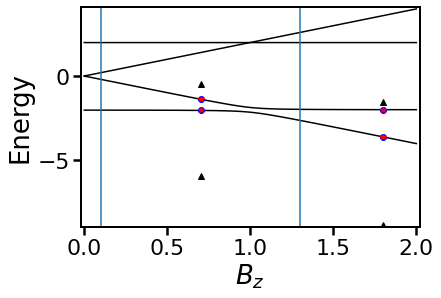

In [6]:
XYinQCinmain()